In [1]:
import cv2 as cv
from skimage import feature
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('img000.jpg')
cv.imshow('Raw Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.5.3) D:\bld\libopencv_1633800998308\work\modules\highgui\src\window.cpp:1006: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [20]:
# HOG from skimage
(ski_hog, ski_hog_image) = feature.hog(
    img, orientations=9, 
    pixels_per_cell=(8, 8), cells_per_block=(2,2), 
    block_norm='L2-Hys', visualize=True, transform_sqrt=True
)

cv.imshow('Ski HOG', ski_hog_image*255)
cv.waitKey(0)
cv.destroyAllWindows()

# 48*48 image contains 6*6 cells and 5*5 blocks for stride of one cell. 
# Every blocks contains 4 cells that has 9 values respectively.
# So 9 * 4 * 25 = 900 features.
print(ski_hog.shape)

(900,)


In [24]:
26*15

390

In [9]:
# HOG from opencv
win_size = (48, 48)      # detect window size
cell_size = (8, 8)       # cell size 
block_size = (16, 16)    # block size, here it contains 4 blocks 
block_stride = (8, 8)    # block stride is 8 pixels, i.e., 1 cell
nbins = 9               # number of bins of orientations

hog = cv.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)

hogDes = hog.compute(img, winStride = (8,8), padding = (0,0))
hogDes.shape

(900, 1)

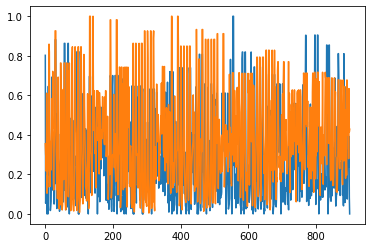

In [21]:
plt.plot(ski_hog/max(ski_hog))
plt.plot(cv_hog/max(cv_hog))

In [32]:
raw_img = cv.imread('../data/training-data/neg/img000.jpg')

In [36]:
h, w = raw_img.shape[:2]

In [37]:
h, w

(720, 1280)